# This Template is created to make grading fair and straightforward. Anything not in the place as mentioned in the template would not be graded.

<font color='red'> # NOTE: We would run the notebook through a Plagiarism Checker. If it is found to be copied, your work would not be graded, and the incident would be highlighted to NYU Authorities. </font>

# Import Library and Dataset

In [36]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

missing_values = ["?"]
train_data = pd.read_csv('qudditch_training.csv', na_values = missing_values)
X_test = pd.read_csv('qudditch_testing_without_target.csv', na_values = missing_values)
train_data['quidditch_league_player'] = [0 if x == 'NO' else 1 for x in train_data['quidditch_league_player']]

In [37]:
X = train_data.drop('quidditch_league_player', 1)
y = train_data.quidditch_league_player

# PART I: Preprocessing

#### Feature Reduction or extraction. (If ANY)

#### Merging columns 'num_games_satout', 'num_games_injured', 'num_games_notpartof' into a single column 'num_games_missed'.

In [38]:
X['num_games_missed'] = X['num_games_satout'] + X['num_games_injured'] + X['num_games_notpartof']
X_test['num_games_missed'] = X_test['num_games_satout'] + X_test['num_games_injured'] + X_test['num_games_notpartof']

#### Dropping unnecessary features.

In [39]:
X = X.drop('weight', 1)
X = X.drop('finbourgh_flick', 1)
X = X.drop('double_eight_loop', 1)
X = X.drop('num_games_satout', 1)
X = X.drop('num_games_injured', 1)
X = X.drop('num_games_notpartof', 1)

X_test = X_test.drop('weight', 1)
X_test = X_test.drop('finbourgh_flick', 1)
X_test = X_test.drop('double_eight_loop', 1)
X_test = X_test.drop('num_games_satout', 1)
X_test = X_test.drop('num_games_injured', 1)
X_test = X_test.drop('num_games_notpartof', 1)

#### Counting the total number of tactics used by each player and storing them in the feature 'total_tactics_used', and dropping the individual features for training dataset

In [40]:
X['total_tactics_used'] = 0
for x in range(len(X)):
    count = 0
    if (X['body_blow'][x] != 'No'):
        count = count + 1
    if (X['checking'][x] != 'No'):
        count = count + 1
    if (X['dopplebeater_defence'][x] != 'No'):
        count = count + 1
    if (X['hawkshead_attacking_formation'][x] != 'No'):
        count = count + 1
    if (X['no_hands_tackle'][x] != 'No'):
        count = count + 1
    if (X['power_play'][x] != 'No'):
        count = count + 1
    if (X['sloth_grip_roll'][x] != 'No'):
        count = count + 1
    if (X['spiral_dive'][x] != 'No'):
        count = count + 1
    if (X['starfish_and_stick'][x] != 'No'):
        count = count + 1
    if (X['twirl'][x] != 'No'):
        count = count + 1
    if (X['wronski_feint'][x] != 'No'):
        count = count + 1
    if (X['zig-zag'][x] != 'No'):
        count = count + 1
    if (X['bludger_backbeat'][x] != 'No'):
        count = count + 1
    if (X['chelmondiston_charge'][x] != 'No'):
        count = count + 1
    if (X['dionysus_dive'][x] != 'No'):
        count = count + 1
    if (X['reverse_pass'][x] != 'No'):
        count = count + 1
    if (X['parkins_pincer'][x] != 'No'):
        count = count + 1
    if (X['plumpton_pass'][x] != 'No'):
        count = count + 1
    if (X['porskoff_ploy'][x] != 'No'):
        count = count + 1
    if (X['transylvanian_tackle'][x] != 'No'):
        count = count + 1
    if (X['woollongong_shimmy'][x] != 'No'):
        count = count + 1
    X['total_tactics_used'][x] = count

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
X = X.drop('body_blow', 1)
X = X.drop('checking', 1)
X = X.drop('dopplebeater_defence', 1)
X = X.drop('hawkshead_attacking_formation', 1)
X = X.drop('no_hands_tackle', 1)
X = X.drop('power_play', 1)
X = X.drop('sloth_grip_roll', 1)
X = X.drop('spiral_dive', 1)
X = X.drop('starfish_and_stick', 1)
X = X.drop('twirl', 1)
X = X.drop('wronski_feint', 1)
X = X.drop('zig-zag', 1)
X = X.drop('bludger_backbeat', 1)
X = X.drop('chelmondiston_charge', 1)
X = X.drop('dionysus_dive', 1)
X = X.drop('reverse_pass', 1)
X = X.drop('parkins_pincer', 1)
X = X.drop('plumpton_pass', 1)
X = X.drop('porskoff_ploy', 1)
X = X.drop('transylvanian_tackle', 1)
X = X.drop('woollongong_shimmy', 1)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 22 columns):
id_num                   101266 non-null int64
player_id                101266 non-null int64
house                    99003 non-null object
gender                   101266 non-null object
age                      101266 non-null float64
foul_type_id             101266 non-null int64
game_move_id             101266 non-null int64
penalty_id               101266 non-null int64
game_duration            101266 non-null int64
player_code              61200 non-null object
move_specialty           51566 non-null object
num_game_moves           101266 non-null int64
num_game_losses          101266 non-null int64
num_practice_sessions    101266 non-null int64
player_type              101266 non-null object
num_games_won            101266 non-null int64
snitchnip                101266 non-null object
stooging                 101266 non-null object
change                   101266 non-n

#### Counting the total number of tactics used by each player and storing them in the feature 'total_tactics_used', and dropping the individual features for test dataset

In [43]:
X_test['total_tactics_used'] = 0
for x in range(len(X_test)):
    count = 0
    if (X_test['body_blow'][x] != 'No'):
        count = count + 1
    if (X_test['checking'][x] != 'No'):
        count = count + 1
    if (X_test['dopplebeater_defence'][x] != 'No'):
        count = count + 1
    if (X_test['hawkshead_attacking_formation'][x] != 'No'):
        count = count + 1
    if (X_test['no_hands_tackle'][x] != 'No'):
        count = count + 1
    if (X_test['power_play'][x] != 'No'):
        count = count + 1
    if (X_test['sloth_grip_roll'][x] != 'No'):
        count = count + 1
    if (X_test['spiral_dive'][x] != 'No'):
        count = count + 1
    if (X_test['starfish_and_stick'][x] != 'No'):
        count = count + 1
    if (X_test['twirl'][x] != 'No'):
        count = count + 1
    if (X_test['wronski_feint'][x] != 'No'):
        count = count + 1
    if (X_test['zig-zag'][x] != 'No'):
        count = count + 1
    if (X_test['bludger_backbeat'][x] != 'No'):
        count = count + 1
    if (X_test['chelmondiston_charge'][x] != 'No'):
        count = count + 1
    if (X_test['dionysus_dive'][x] != 'No'):
        count = count + 1
    if (X_test['reverse_pass'][x] != 'No'):
        count = count + 1
    if (X_test['parkins_pincer'][x] != 'No'):
        count = count + 1
    if (X_test['plumpton_pass'][x] != 'No'):
        count = count + 1
    if (X_test['porskoff_ploy'][x] != 'No'):
        count = count + 1
    if (X_test['transylvanian_tackle'][x] != 'No'):
        count = count + 1
    if (X_test['woollongong_shimmy'][x] != 'No'):
        count = count + 1
    X_test['total_tactics_used'][x] = count

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
X_test = X_test.drop('body_blow', 1)
X_test = X_test.drop('checking', 1)
X_test = X_test.drop('dopplebeater_defence', 1)
X_test = X_test.drop('hawkshead_attacking_formation', 1)
X_test = X_test.drop('no_hands_tackle', 1)
X_test = X_test.drop('power_play', 1)
X_test = X_test.drop('sloth_grip_roll', 1)
X_test = X_test.drop('spiral_dive', 1)
X_test = X_test.drop('starfish_and_stick', 1)
X_test = X_test.drop('twirl', 1)
X_test = X_test.drop('wronski_feint', 1)
X_test = X_test.drop('zig-zag', 1)
X_test = X_test.drop('bludger_backbeat', 1)
X_test = X_test.drop('chelmondiston_charge', 1)
X_test = X_test.drop('dionysus_dive', 1)
X_test = X_test.drop('reverse_pass', 1)
X_test = X_test.drop('parkins_pincer', 1)
X_test = X_test.drop('plumpton_pass', 1)
X_test = X_test.drop('porskoff_ploy', 1)
X_test = X_test.drop('transylvanian_tackle', 1)
X_test = X_test.drop('woollongong_shimmy', 1)

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
id_num                   500 non-null int64
player_id                500 non-null int64
house                    490 non-null object
gender                   500 non-null object
age                      500 non-null float64
foul_type_id             500 non-null int64
game_move_id             500 non-null int64
penalty_id               500 non-null int64
game_duration            500 non-null int64
player_code              310 non-null object
move_specialty           251 non-null object
num_game_moves           500 non-null int64
num_game_losses          500 non-null int64
num_practice_sessions    500 non-null int64
player_type              500 non-null object
num_games_won            500 non-null int64
snitchnip                500 non-null object
stooging                 500 non-null object
change                   500 non-null object
snitch_caught            500 non-null object
num_

In [46]:
#Copying into new variables
X_new = X
y_new = y
X_test_new = X_test
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 22 columns):
id_num                   101266 non-null int64
player_id                101266 non-null int64
house                    99003 non-null object
gender                   101266 non-null object
age                      101266 non-null float64
foul_type_id             101266 non-null int64
game_move_id             101266 non-null int64
penalty_id               101266 non-null int64
game_duration            101266 non-null int64
player_code              61200 non-null object
move_specialty           51566 non-null object
num_game_moves           101266 non-null int64
num_game_losses          101266 non-null int64
num_practice_sessions    101266 non-null int64
player_type              101266 non-null object
num_games_won            101266 non-null int64
snitchnip                101266 non-null object
stooging                 101266 non-null object
change                   101266 non-n

In [47]:
#Reducing the number of categories
a = X_new['stooging'].value_counts()
for i, row in X_new.iterrows():
    move = row['stooging']
    if (move != 'None') and (move != 'Norm'):
        move = 'High'
    X_new.set_value(i,'stooging',move)
    
a = X_test_new['stooging'].value_counts()
for i, row in X_test_new.iterrows():
    move = row['stooging']
    if (move != 'None') and (move != 'Norm'):
        move = 'High'
    X_test_new.set_value(i,'stooging',move)

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [48]:
#Reducing the number of categories
a = X_new['snitchnip'].value_counts()
for i, row in X_new.iterrows():
    move = row['snitchnip']
    if (move != 'None') and (move != 'Norm'):
        move = 'High'
    X_new.set_value(i,'snitchnip',move)
    
a = X_test_new['snitchnip'].value_counts()
for i, row in X_test_new.iterrows():
    move = row['snitchnip']
    if (move != 'None') and (move != 'Norm'):
        move = 'High'
    X_test_new.set_value(i,'snitchnip',move)

C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\kaust\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Any other Pre-processing Used. (Give the name along with the code.)

#### Log Transformation and Standardization of skewed features in training and test data.

In [49]:
from scipy.stats import skew

numeric_feats = X_new.dtypes[X_new.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = X_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))

skewness.tail(300)


Skew in numerical features: 

There are 13 skewed numerical features


,Skew
num_games_missed,5.303182
game_move_id,2.563431
foul_type_id,1.591475
num_practice_sessions,1.327026
num_game_losses,1.316797
game_duration,1.133567
penalty_id,1.029983
total_tactics_used,NaN
player_id,NaN
id_num,NaN



 mu = 1.20 and sigma = 2.29



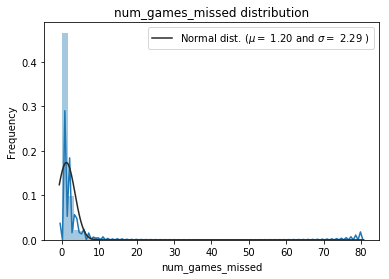

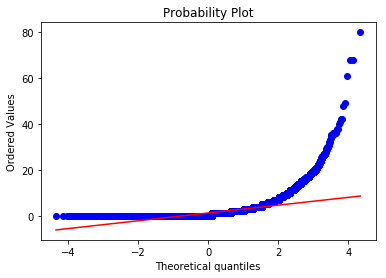

In [50]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(X_new['num_games_missed'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X_new['num_games_missed'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.ylabel('Frequency')
plt.title('num_games_missed distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(X_new['num_games_missed'], plot=plt)
plt.show()


 mu = 0.51 and sigma = 0.66



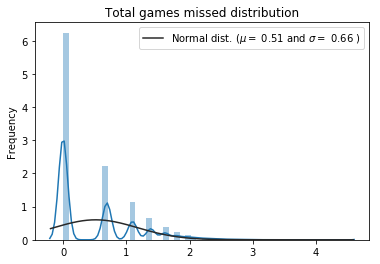

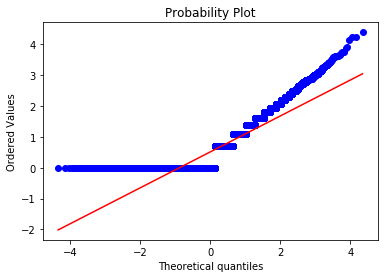

In [51]:
#Performing log transform for training data. We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
const = 1
log_targetvar = []
for i in X_new['num_games_missed']:
    
    log_targetvar.append(np.log(const + i))
    
log_num_games_missed = pd.DataFrame({'num_games_missed':log_targetvar})
X_new['num_games_missed'] = log_num_games_missed['num_games_missed']

#Check the new distribution 
sns.distplot(log_targetvar , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(log_targetvar)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total games missed distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(log_targetvar, plot=plt)
plt.show()


 mu = 0.49 and sigma = 0.66



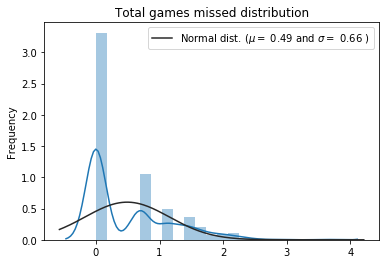

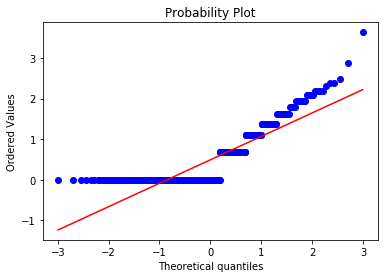

In [52]:
#Performing log transform for test data. We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
const = 1
log_targetvar = []
for i in X_test_new['num_games_missed']:
    
    log_targetvar.append(np.log(const + i))

log_num_games_missed = pd.DataFrame({'num_games_missed':log_targetvar})
X_test_new['num_games_missed'] = log_num_games_missed['num_games_missed']

#Check the new distribution 
sns.distplot(log_targetvar , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(log_targetvar)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total games missed distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(log_targetvar, plot=plt)
plt.show()

In [53]:
#Standardizing numerical features after log transform in training dataset
num_games_missed_mean = np.mean(X_new['num_games_missed'])
num_games_missed_std = np.std(X_new['num_games_missed']) 

X_new['num_games_missed'] = (X_new['num_games_missed'] - num_games_missed_mean)/num_games_missed_std
print('after standardization - training data')
print(X_new['num_games_missed'].head(10))

after standardization - training data
0   -0.777214
1   -0.777214
2    1.315246
3   -0.777214
4   -0.777214
5   -0.777214
6   -0.777214
7   -0.777214
8   -0.777214
9   -0.777214
Name: num_games_missed, dtype: float64


In [54]:
#Standardizing numerical features after log transform in test dataset
num_games_missed_mean = np.mean(X_test_new['num_games_missed'])
num_games_missed_std = np.std(X_test_new['num_games_missed']) 

X_test_new['num_games_missed'] = (X_test_new['num_games_missed'] - num_games_missed_mean)/num_games_missed_std
print('after standardization - test data')
print(X_test_new['num_games_missed'].head(10))

after standardization - test data
0    0.304673
1   -0.741774
2   -0.741774
3    0.304673
4   -0.741774
5    0.304673
6   -0.741774
7    0.304673
8   -0.741774
9    3.621830
Name: num_games_missed, dtype: float64


#### Feature Datatype Conversion From Numeric to categoric and Vice-versa. (If ANY)

In [55]:
#Conversion of categorical features into numerical features in training dataset
X_new['house'] = X_new['house'].astype('category')
X_new['gender'] = X_new['gender'].astype('category')
X_new['player_code'] = X_new['player_code'].astype('category')
X_new['move_specialty'] = X_new['move_specialty'].astype('category')
X_new['player_type'] = X_new['player_type'].astype('category')
X_new['snitchnip'] = X_new['snitchnip'].astype('category')
X_new['stooging'] = X_new['stooging'].astype('category')
X_new['change'] = X_new['change'].astype('category')
X_new['snitch_caught'] = X_new['snitch_caught'].astype('category')

In [56]:
cat_columns = X_new.select_dtypes(['category']).columns
X_new[cat_columns] = X_new[cat_columns].apply(lambda x: x.cat.codes)
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 22 columns):
id_num                   101266 non-null int64
player_id                101266 non-null int64
house                    101266 non-null int8
gender                   101266 non-null int8
age                      101266 non-null float64
foul_type_id             101266 non-null int64
game_move_id             101266 non-null int64
penalty_id               101266 non-null int64
game_duration            101266 non-null int64
player_code              101266 non-null int8
move_specialty           101266 non-null int8
num_game_moves           101266 non-null int64
num_game_losses          101266 non-null int64
num_practice_sessions    101266 non-null int64
player_type              101266 non-null int8
num_games_won            101266 non-null int64
snitchnip                101266 non-null int8
stooging                 101266 non-null int8
change                   101266 non-null int8
sn

In [57]:
#Conversion of categorical features into numerical features in test dataset
X_test_new['house'] = X_test_new['house'].astype('category')
X_test_new['gender'] = X_test_new['gender'].astype('category')
X_test_new['player_code'] = X_test_new['player_code'].astype('category')
X_test_new['move_specialty'] = X_test_new['move_specialty'].astype('category')
X_test_new['player_type'] = X_test_new['player_type'].astype('category')
X_test_new['snitchnip'] = X_test_new['snitchnip'].astype('category')
X_test_new['stooging'] = X_test_new['stooging'].astype('category')
X_test_new['change'] = X_test_new['change'].astype('category')
X_test_new['snitch_caught'] = X_test_new['snitch_caught'].astype('category')

In [58]:
cat_columns = X_test_new.select_dtypes(['category']).columns
X_test_new[cat_columns] = X_test_new[cat_columns].apply(lambda x: x.cat.codes)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
id_num                   500 non-null int64
player_id                500 non-null int64
house                    500 non-null int8
gender                   500 non-null int8
age                      500 non-null float64
foul_type_id             500 non-null int64
game_move_id             500 non-null int64
penalty_id               500 non-null int64
game_duration            500 non-null int64
player_code              500 non-null int8
move_specialty           500 non-null int8
num_game_moves           500 non-null int64
num_game_losses          500 non-null int64
num_practice_sessions    500 non-null int64
player_type              500 non-null int8
num_games_won            500 non-null int64
snitchnip                500 non-null int8
stooging                 500 non-null int8
change                   500 non-null int8
snitch_caught            500 non-null int8
num_games_missed      

#### Handling missing values. (If ANY)

In [59]:
X_new['house'] = ['NaN' if x == -1 else x for x in X_new['house']]
X_new['move_specialty'] = ['NaN' if x == -1 else x for x in X_new['move_specialty']]
X_new['player_code'] = ['NaN' if x == -1 else x for x in X_new['player_code']]

In [60]:
X_test_new['house'] = ['NaN' if x == -1 else x for x in X_test_new['house']]
X_test_new['move_specialty'] = ['NaN' if x == -1 else x for x in X_test_new['move_specialty']]
X_test_new['player_code'] = ['NaN' if x == -1 else x for x in X_test_new['player_code']]

In [61]:
#Using Imputer function to replace missing values in training dataset
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imp.fit(X_new)
X_new= pd.DataFrame(data = imp.transform(X_new), columns = X_new.columns)

In [62]:
#Using Imputer function to replace missing values in test dataset
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imp.fit(X_test_new)
X_test_new= pd.DataFrame(data = imp.transform(X_test_new), columns = X_test_new.columns)

#### Any other Pre-processing Used. (Give the name along with the code.)

#### Removing outliers from training data.

In [63]:
def find_outliers(x) :
    mean = np.mean(x)
    std = np.std(x)
    floor = mean - 3*std
    ceiling = mean + 3*std
    outlier_indices = set((x.index[(x < floor) | (x > ceiling)]))
    return outlier_indices

In [64]:
outlier_indices = find_outliers(X_new['age'])
outlier_indices = outlier_indices.union(find_outliers(X_new['foul_type_id']))
outlier_indices = outlier_indices.union(find_outliers(X_new['game_move_id']))
outlier_indices = outlier_indices.union(find_outliers(X_new['penalty_id']))
outlier_indices = outlier_indices.union(find_outliers(X_new['game_duration']))
outlier_indices = outlier_indices.union(find_outliers(X_new['num_game_moves']))
outlier_indices = outlier_indices.union(find_outliers(X_new['num_game_losses']))
outlier_indices = outlier_indices.union(find_outliers(X_new['num_practice_sessions']))
outlier_indices = outlier_indices.union(find_outliers(X_new['num_games_missed']))
outlier_indices = outlier_indices.union(find_outliers(X_new['foul_type_id']))
outlier_indices = outlier_indices.union(find_outliers(X_new['total_tactics_used']))

for i in outlier_indices:
    X_new.drop(i, inplace = True)
    y_new.drop(i, inplace = True)
    
print(X_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92260 entries, 2 to 101265
Data columns (total 22 columns):
id_num                   92260 non-null float64
player_id                92260 non-null float64
house                    92260 non-null float64
gender                   92260 non-null float64
age                      92260 non-null float64
foul_type_id             92260 non-null float64
game_move_id             92260 non-null float64
penalty_id               92260 non-null float64
game_duration            92260 non-null float64
player_code              92260 non-null float64
move_specialty           92260 non-null float64
num_game_moves           92260 non-null float64
num_game_losses          92260 non-null float64
num_practice_sessions    92260 non-null float64
player_type              92260 non-null float64
num_games_won            92260 non-null float64
snitchnip                92260 non-null float64
stooging                 92260 non-null float64
change                   9

#### Using SMOTE to balance the imbalanced training dataset.

In [65]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_new_smote, y_new_smote = smt.fit_sample(X_new, y_new)

# PART II: Classification

In [66]:
#Splitting training data into train and test data. Only for model training purposes.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x_train_smote, x_test_smote, y_train_smote, y_test_smote = np.array(train_test_split(x_new_smote, y_new_smote, train_size = 0.8))

C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Model 1:
Model Name: Logistic Regression<br>
Evaluation method and metric used Name: Accuracy and Confusion Matrix<br>
Name of the Hyperparameter used: folds, class_weight, c<br>


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

folds = [5, 10, 15, 20]
class_weight = [None, 'balanced']
c = [0.01, 1, 100]

for i in folds:
    for j in class_weight:
        for k in c:
            lr = LogisticRegression(class_weight = j, solver = 'liblinear', penalty = 'l2', multi_class = 'ovr', C = k)
            cvpred = cross_val_predict(lr, x_new_smote, y_new_smote, cv = i)
            cvscore = accuracy_score(y_new_smote, cvpred)
            cm_lr = confusion_matrix(y_new_smote, cvpred)
            print("Folds: ", i, "Class weight: ", j, "C: ", k, "Accuracy: ", cvscore)
            print("Confusion_Matrix: ")
            print(cm_lr)

Folds:  5 Class weight:  None C:  0.01 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  5 Class weight:  None C:  1 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  5 Class weight:  None C:  100 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  5 Class weight:  balanced C:  0.01 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  5 Class weight:  balanced C:  1 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  5 Class weight:  balanced C:  100 Accuracy:  0.4543219021712731
Confusion_Matrix: 
[[28857 53491]
 [36380 45968]]
Folds:  10 Class weight:  None C:  0.01 Accuracy:  0.46181449458396073
Confusion_Matrix: 
[[32004 50344]
 [38293 44055]]
Folds:  10 Class weight:  None C:  1 Accuracy:  0.46181449458396073
Confusion_Matrix: 
[[32004 50344]
 [38293 44055]]
Folds:  10 Class weight:  None C:  100 Accu

### Model 2:
Model Name: Decision Tree Classifier<br>
Evaluation method and metric used Name: Accuracy Score and Confusion Matrix<br>
Name of the Hyperparameter used: min_samples_leaf, min_samples_split, max_features, max_depth<br>


In [73]:
from sklearn.tree import DecisionTreeClassifier as dsc

leaves = [5, 10, 15, 30, 70, 100, 200, 500, 1000, 2000]
min_samples_split = [2, 5, 10]
max_features = ['sqrt', 'log2', None]
max_depth = [10, 20, 30, 50, 70, 100, None]
 
for i in leaves:
    for j in min_samples_split:
        for k in max_features:
            for l in max_depth:
                ds_smote = dsc(min_samples_leaf=i, min_samples_split = j, max_features = k, max_depth = l, random_state = 42)
                ds_smote.fit(x_train_smote, y_train_smote)
                preds_1 = ds_smote.predict(x_test_smote)
                #cv_score = cross_val_score(ds_smote_fit, train_set, y, cv = 5, scoring='accuracy')
                score_smote2 = accuracy_score(y_test_smote, preds_1)
                cm = confusion_matrix(y_test_smote, preds_1)
                print("Leaves: ", i, "Min samples split: ", j, "Max features: ", k, "Max depth: ", l,"Accuracy: ", score_smote2)
                print("Confusion Matrix: ")
                print(cm)
                print(' ')

Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  10 Accuracy:  0.8551608986035215
Confusion Matrix: 
[[15138  1248]
 [ 3523 13031]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  20 Accuracy:  0.895658773527626
Confusion Matrix: 
[[15332  1054]
 [ 2383 14171]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  30 Accuracy:  0.8994231936854887
Confusion Matrix: 
[[15322  1064]
 [ 2249 14305]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  50 Accuracy:  0.893685488767456
Confusion Matrix: 
[[15199  1187]
 [ 2315 14239]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  70 Accuracy:  0.893685488767456
Confusion Matrix: 
[[15199  1187]
 [ 2315 14239]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  100 Accuracy:  0.893685488767456
Confusion Matrix: 
[[15199  1187]
 [ 2315 14239]]
 
Leaves:  5 Min samples split:  2 Max features:  sqrt Max depth:  None Accuracy:  0.893685488767456
Conf

Leaves:  5 Min samples split:  10 Max features:  log2 Max depth:  None Accuracy:  0.893685488767456
Confusion Matrix: 
[[15199  1187]
 [ 2315 14239]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  10 Accuracy:  0.8972677595628415
Confusion Matrix: 
[[15250  1136]
 [ 2248 14306]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  20 Accuracy:  0.9107468123861566
Confusion Matrix: 
[[15475   911]
 [ 2029 14525]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  30 Accuracy:  0.9045233758348512
Confusion Matrix: 
[[15143  1243]
 [ 1902 14652]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  50 Accuracy:  0.9044323011536126
Confusion Matrix: 
[[15152  1234]
 [ 1914 14640]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  70 Accuracy:  0.9044323011536126
Confusion Matrix: 
[[15152  1234]
 [ 1914 14640]]
 
Leaves:  5 Min samples split:  10 Max features:  None Max depth:  100 Accuracy:  0.9044323011

Leaves:  10 Min samples split:  10 Max features:  sqrt Max depth:  100 Accuracy:  0.8962355798421372
Confusion Matrix: 
[[15468   918]
 [ 2500 14054]]
 
Leaves:  10 Min samples split:  10 Max features:  sqrt Max depth:  None Accuracy:  0.8962355798421372
Confusion Matrix: 
[[15468   918]
 [ 2500 14054]]
 
Leaves:  10 Min samples split:  10 Max features:  log2 Max depth:  10 Accuracy:  0.837431693989071
Confusion Matrix: 
[[15201  1185]
 [ 4170 12384]]
 
Leaves:  10 Min samples split:  10 Max features:  log2 Max depth:  20 Accuracy:  0.8982999392835458
Confusion Matrix: 
[[15605   781]
 [ 2569 13985]]
 
Leaves:  10 Min samples split:  10 Max features:  log2 Max depth:  30 Accuracy:  0.8962355798421372
Confusion Matrix: 
[[15468   918]
 [ 2500 14054]]
 
Leaves:  10 Min samples split:  10 Max features:  log2 Max depth:  50 Accuracy:  0.8962355798421372
Confusion Matrix: 
[[15468   918]
 [ 2500 14054]]
 
Leaves:  10 Min samples split:  10 Max features:  log2 Max depth:  70 Accuracy:  0.896

Leaves:  15 Min samples split:  5 Max features:  None Max depth:  70 Accuracy:  0.9156344869459624
Confusion Matrix: 
[[15761   625]
 [ 2154 14400]]
 
Leaves:  15 Min samples split:  5 Max features:  None Max depth:  100 Accuracy:  0.9156344869459624
Confusion Matrix: 
[[15761   625]
 [ 2154 14400]]
 
Leaves:  15 Min samples split:  5 Max features:  None Max depth:  None Accuracy:  0.9156344869459624
Confusion Matrix: 
[[15761   625]
 [ 2154 14400]]
 
Leaves:  15 Min samples split:  10 Max features:  sqrt Max depth:  10 Accuracy:  0.840983606557377
Confusion Matrix: 
[[14875  1511]
 [ 3727 12827]]
 
Leaves:  15 Min samples split:  10 Max features:  sqrt Max depth:  20 Accuracy:  0.8969945355191257
Confusion Matrix: 
[[15676   710]
 [ 2683 13871]]
 
Leaves:  15 Min samples split:  10 Max features:  sqrt Max depth:  30 Accuracy:  0.8988463873709776
Confusion Matrix: 
[[15699   687]
 [ 2645 13909]]
 
Leaves:  15 Min samples split:  10 Max features:  sqrt Max depth:  50 Accuracy:  0.898846

Leaves:  30 Min samples split:  5 Max features:  log2 Max depth:  30 Accuracy:  0.8890103217972071
Confusion Matrix: 
[[15682   704]
 [ 2952 13602]]
 
Leaves:  30 Min samples split:  5 Max features:  log2 Max depth:  50 Accuracy:  0.8890103217972071
Confusion Matrix: 
[[15682   704]
 [ 2952 13602]]
 
Leaves:  30 Min samples split:  5 Max features:  log2 Max depth:  70 Accuracy:  0.8890103217972071
Confusion Matrix: 
[[15682   704]
 [ 2952 13602]]
 
Leaves:  30 Min samples split:  5 Max features:  log2 Max depth:  100 Accuracy:  0.8890103217972071
Confusion Matrix: 
[[15682   704]
 [ 2952 13602]]
 
Leaves:  30 Min samples split:  5 Max features:  log2 Max depth:  None Accuracy:  0.8890103217972071
Confusion Matrix: 
[[15682   704]
 [ 2952 13602]]
 
Leaves:  30 Min samples split:  5 Max features:  None Max depth:  10 Accuracy:  0.8958105646630237
Confusion Matrix: 
[[15263  1123]
 [ 2309 14245]]
 
Leaves:  30 Min samples split:  5 Max features:  None Max depth:  20 Accuracy:  0.917395264

Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  20 Accuracy:  0.8815118397085611
Confusion Matrix: 
[[15566   820]
 [ 3083 13471]]
 
Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  30 Accuracy:  0.8814511232544019
Confusion Matrix: 
[[15554   832]
 [ 3073 13481]]
 
Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  50 Accuracy:  0.8814511232544019
Confusion Matrix: 
[[15554   832]
 [ 3073 13481]]
 
Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  70 Accuracy:  0.8814511232544019
Confusion Matrix: 
[[15554   832]
 [ 3073 13481]]
 
Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  100 Accuracy:  0.8814511232544019
Confusion Matrix: 
[[15554   832]
 [ 3073 13481]]
 
Leaves:  70 Min samples split:  5 Max features:  sqrt Max depth:  None Accuracy:  0.8814511232544019
Confusion Matrix: 
[[15554   832]
 [ 3073 13481]]
 
Leaves:  70 Min samples split:  5 Max features:  log2 Max depth:  10 Accuracy:  0.840042501

Leaves:  100 Min samples split:  2 Max features:  None Max depth:  10 Accuracy:  0.8933515482695811
Confusion Matrix: 
[[15223  1163]
 [ 2350 14204]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  20 Accuracy:  0.913023679417122
Confusion Matrix: 
[[16076   310]
 [ 2555 13999]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  30 Accuracy:  0.9137826350941105
Confusion Matrix: 
[[16130   256]
 [ 2584 13970]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  50 Accuracy:  0.9137826350941105
Confusion Matrix: 
[[16130   256]
 [ 2584 13970]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  70 Accuracy:  0.9137826350941105
Confusion Matrix: 
[[16130   256]
 [ 2584 13970]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  100 Accuracy:  0.9137826350941105
Confusion Matrix: 
[[16130   256]
 [ 2584 13970]]
 
Leaves:  100 Min samples split:  2 Max features:  None Max depth:  None Accuracy:  0.913

Leaves:  200 Min samples split:  2 Max features:  sqrt Max depth:  100 Accuracy:  0.8720097146326654
Confusion Matrix: 
[[15617   769]
 [ 3447 13107]]
 
Leaves:  200 Min samples split:  2 Max features:  sqrt Max depth:  None Accuracy:  0.8720097146326654
Confusion Matrix: 
[[15617   769]
 [ 3447 13107]]
 
Leaves:  200 Min samples split:  2 Max features:  log2 Max depth:  10 Accuracy:  0.8300546448087431
Confusion Matrix: 
[[14090  2296]
 [ 3302 13252]]
 
Leaves:  200 Min samples split:  2 Max features:  log2 Max depth:  20 Accuracy:  0.8720097146326654
Confusion Matrix: 
[[15611   775]
 [ 3441 13113]]
 
Leaves:  200 Min samples split:  2 Max features:  log2 Max depth:  30 Accuracy:  0.8720097146326654
Confusion Matrix: 
[[15617   769]
 [ 3447 13107]]
 
Leaves:  200 Min samples split:  2 Max features:  log2 Max depth:  50 Accuracy:  0.8720097146326654
Confusion Matrix: 
[[15617   769]
 [ 3447 13107]]
 
Leaves:  200 Min samples split:  2 Max features:  log2 Max depth:  70 Accuracy:  0.87

Leaves:  200 Min samples split:  10 Max features:  None Max depth:  50 Accuracy:  0.90591985428051
Confusion Matrix: 
[[16169   217]
 [ 2882 13672]]
 
Leaves:  200 Min samples split:  10 Max features:  None Max depth:  70 Accuracy:  0.90591985428051
Confusion Matrix: 
[[16169   217]
 [ 2882 13672]]
 
Leaves:  200 Min samples split:  10 Max features:  None Max depth:  100 Accuracy:  0.90591985428051
Confusion Matrix: 
[[16169   217]
 [ 2882 13672]]
 
Leaves:  200 Min samples split:  10 Max features:  None Max depth:  None Accuracy:  0.90591985428051
Confusion Matrix: 
[[16169   217]
 [ 2882 13672]]
 
Leaves:  500 Min samples split:  2 Max features:  sqrt Max depth:  10 Accuracy:  0.8207043108682452
Confusion Matrix: 
[[14444  1942]
 [ 3964 12590]]
 
Leaves:  500 Min samples split:  2 Max features:  sqrt Max depth:  20 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  2 Max features:  sqrt Max depth:  30 Accuracy:  0.8492106

Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  20 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  30 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  50 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  70 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  100 Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  log2 Max depth:  None Accuracy:  0.849210686095932
Confusion Matrix: 
[[14931  1455]
 [ 3512 13042]]
 
Leaves:  500 Min samples split:  10 Max features:  None Max depth:  10 Accuracy:  0.8

Leaves:  1000 Min samples split:  5 Max features:  None Max depth:  None Accuracy:  0.8805100182149362
Confusion Matrix: 
[[15859   527]
 [ 3409 13145]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  10 Accuracy:  0.8097146326654523
Confusion Matrix: 
[[14445  1941]
 [ 4327 12227]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  20 Accuracy:  0.8068306010928962
Confusion Matrix: 
[[14297  2089]
 [ 4274 12280]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  30 Accuracy:  0.8068306010928962
Confusion Matrix: 
[[14297  2089]
 [ 4274 12280]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  50 Accuracy:  0.8068306010928962
Confusion Matrix: 
[[14297  2089]
 [ 4274 12280]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  70 Accuracy:  0.8068306010928962
Confusion Matrix: 
[[14297  2089]
 [ 4274 12280]]
 
Leaves:  1000 Min samples split:  10 Max features:  sqrt Max depth:  100 Ac

Leaves:  2000 Min samples split:  5 Max features:  log2 Max depth:  70 Accuracy:  0.8049180327868852
Confusion Matrix: 
[[15464   922]
 [ 5504 11050]]
 
Leaves:  2000 Min samples split:  5 Max features:  log2 Max depth:  100 Accuracy:  0.8049180327868852
Confusion Matrix: 
[[15464   922]
 [ 5504 11050]]
 
Leaves:  2000 Min samples split:  5 Max features:  log2 Max depth:  None Accuracy:  0.8049180327868852
Confusion Matrix: 
[[15464   922]
 [ 5504 11050]]
 
Leaves:  2000 Min samples split:  5 Max features:  None Max depth:  10 Accuracy:  0.8442015786278081
Confusion Matrix: 
[[14712  1674]
 [ 3458 13096]]
 
Leaves:  2000 Min samples split:  5 Max features:  None Max depth:  20 Accuracy:  0.8480570734669095
Confusion Matrix: 
[[15036  1350]
 [ 3655 12899]]
 
Leaves:  2000 Min samples split:  5 Max features:  None Max depth:  30 Accuracy:  0.8480570734669095
Confusion Matrix: 
[[15036  1350]
 [ 3655 12899]]
 
Leaves:  2000 Min samples split:  5 Max features:  None Max depth:  50 Accuracy

### Model 3:
Model Name: Random Forest Classifier<br>
Evaluation method and metric used Name: Accuracy Score and Confusion Matrix<br>
Name of the Hyperparameter used: n_estimators, min_samples_split, max_features, max_depth, bootstrap<br>


In [75]:
from sklearn.ensemble import RandomForestClassifier as rfc

rf_smote1 = rfc(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 30, bootstrap = False, random_state = 42)
rf_smote2 = rfc(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 90, bootstrap = False, random_state = 42)
rf_smote3 = rfc(n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False, random_state = 42)



# Train the model on training data
rf_smote1.fit(x_train_smote, y_train_smote)
rf_smote2.fit(x_train_smote, y_train_smote)
rf_smote3.fit(x_train_smote, y_train_smote)

predictions_rf_smote1 = rf_smote1.predict(x_test_smote)
predictions_rf_smote2 = rf_smote2.predict(x_test_smote)
predictions_rf_smote3 = rf_smote3.predict(x_test_smote)

# print(predictions_rf_smote)

score_smote1 = accuracy_score(y_test_smote, predictions_rf_smote1)
cm1 = confusion_matrix(y_test_smote, predictions_rf_smote1)
print("Accuracy_1: ", score_smote1)
print("Confusion_Matrix_1: ")
print(cm1)

score_smote2 = accuracy_score(y_test_smote, predictions_rf_smote2)
cm2 = confusion_matrix(y_test_smote, predictions_rf_smote2)
print("Accuracy_2: ", score_smote2)
print("Confusion_Matrix_2: ")
print(cm2)

score_smote3 = accuracy_score(y_test_smote, predictions_rf_smote3)
cm3 = confusion_matrix(y_test_smote, predictions_rf_smote3)
print("Accuracy_3: ", score_smote3)
print("Confusion_Matrix_3: ")
print(cm3)

Accuracy_1:  0.9400728597449909
Confusion_Matrix_1: 
[[16352    34]
 [ 1940 14614]]
Accuracy_2:  0.9395264116575592
Confusion_Matrix_2: 
[[16359    27]
 [ 1965 14589]]
Accuracy_3:  0.940528233151184
Confusion_Matrix_3: 
[[16346    40]
 [ 1919 14635]]


# PART III: Best Hypothesis:
Model Name: Random Forest Classifier<br>
Reason: Highest accuracy and best confusion matrix among all above models<br>
Hyper-parameter Value: n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False, random_state = 42<br>


### Running the best model (Random Forest Classifier) on the test data.

In [76]:
rf_final = rfc(n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False, random_state = 42)

# Train the model on training data
rf_final.fit(x_new_smote, y_new_smote)

#Making predictions on test dataset
predictions_rf_final = rf_final.predict(X_test_new)

In [81]:
df = pd.DataFrame(predictions_rf_final, columns=['quidditch_league_player'])
df['quidditch_league_player'] = ['YES' if x == 1 else 'NO' for x in df['quidditch_league_player']]
df.to_csv("test_outputs.csv", encoding='utf-8')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
quidditch_league_player    500 non-null object
dtypes: object(1)
memory usage: 4.0+ KB
